# Determine expression relationships between constructs
Correlations between aggregate groups are compared

## Imports

In [1]:
import sys
from pathlib import Path

import pandas as pd

## Find the root of the git repo on the host system

In [2]:
# Get the current working directory
cwd = Path.cwd()

if (cwd / ".git").is_dir():
    root_dir = cwd

else:
    root_dir = None
    for parent in cwd.parents:
        if (parent / ".git").is_dir():
            root_dir = parent
            break

# Check if a Git root directory was found
if root_dir is None:
    raise FileNotFoundError("No Git root directory found.")

## Import helper correlation class

In [3]:
sys.path.append(
    f"{root_dir}/0.data_analysis/construct_phenotypic_expression_plate_4_fs_data/utils"
)
import create_correlations as cc

## Define Paths

In [4]:
# Change this filename when plate 4 is available
filename = "Plate_4_bulk_norm_fs.parquet"

# Path to the plate data
path = Path(
    f"{root_dir}/nf1_painting_repo/3.processing_features/data/feature_selected_data/{filename}"
)

# Add the output path here:
output_path_figures = Path("figures")

output_path_data = Path("data")

# Create the directories if they don't exist
output_path_figures.mkdir(parents=True, exist_ok=True)
output_path_data.mkdir(parents=True, exist_ok=True)

## Load the data

In [5]:
platedf = pd.read_parquet(path)

## Create correlations object

In [6]:
corr_obj = cc.CreateCorrelations(platedf=platedf)

## Save the correlation data

In [7]:
corr_obj.final_construct.to_csv(output_path_data / "correlation_data.tsv", sep="\t")

## Create correlation pdfs

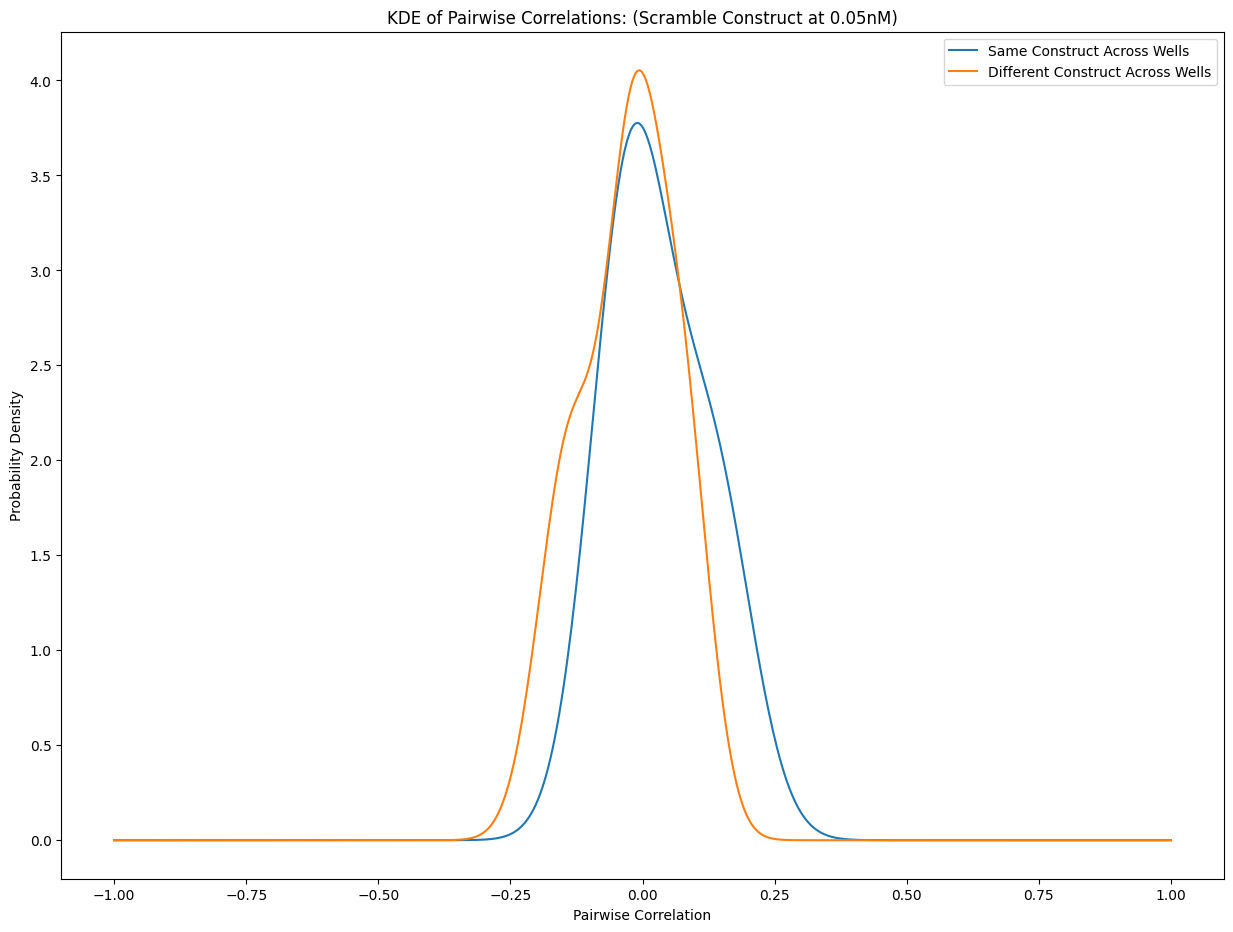

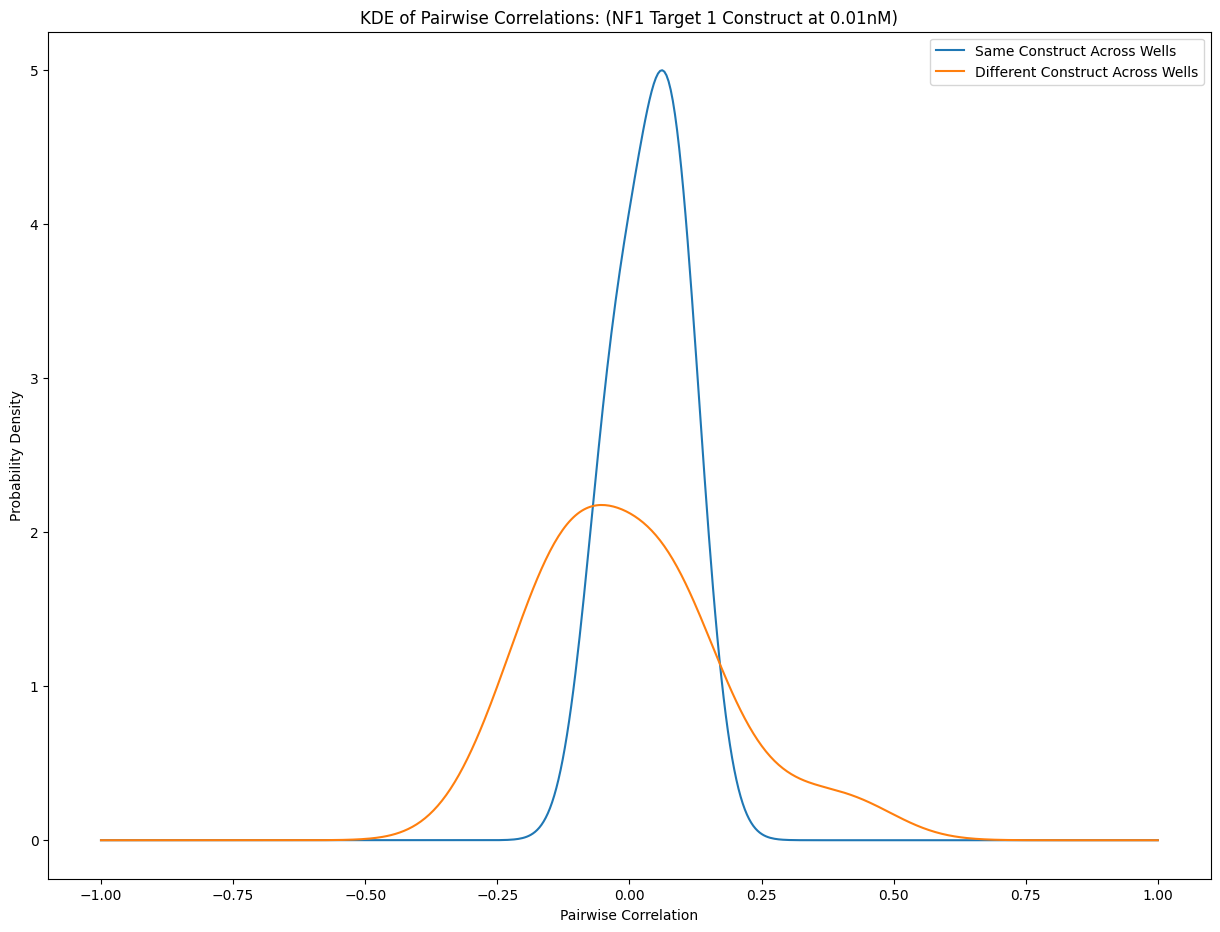

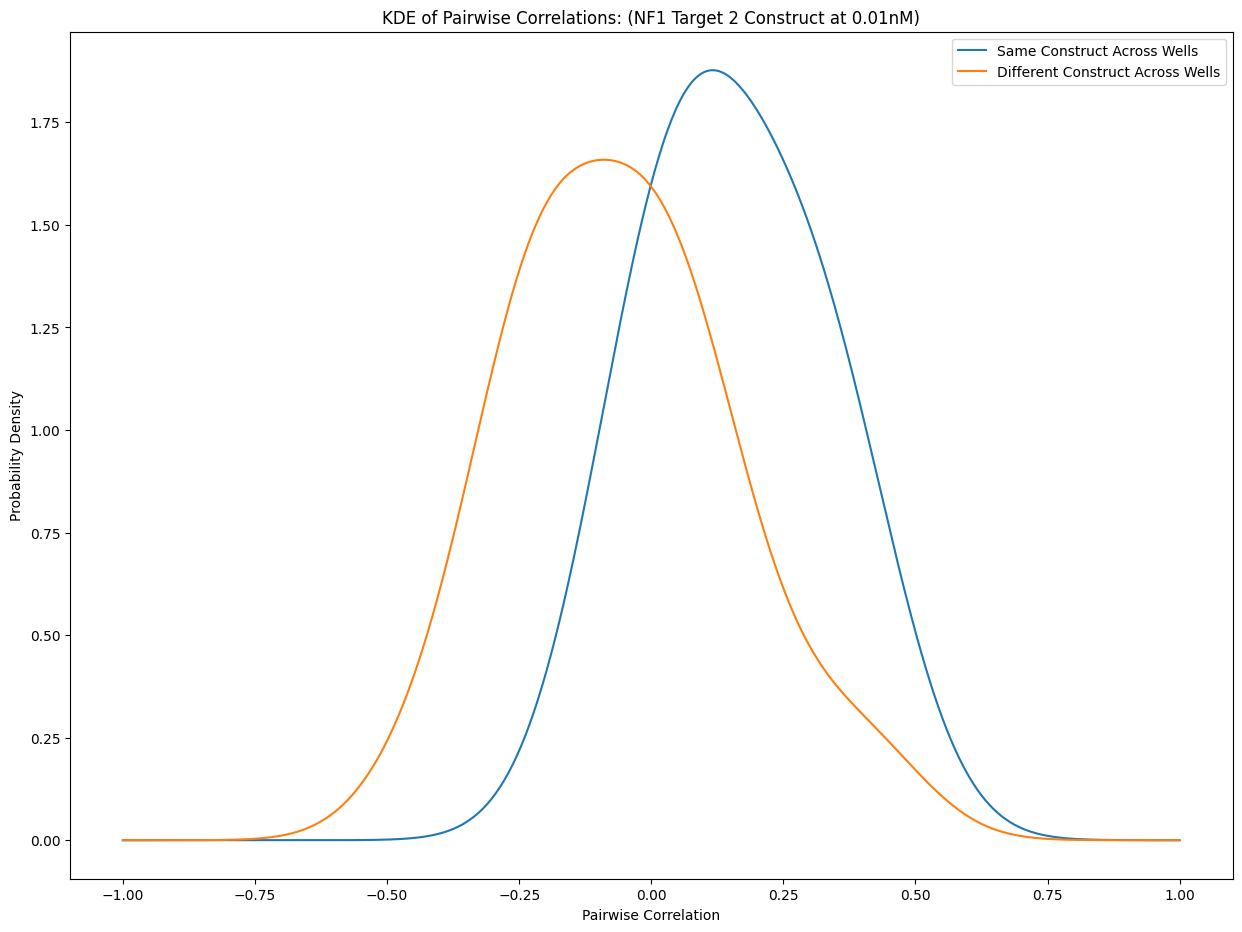

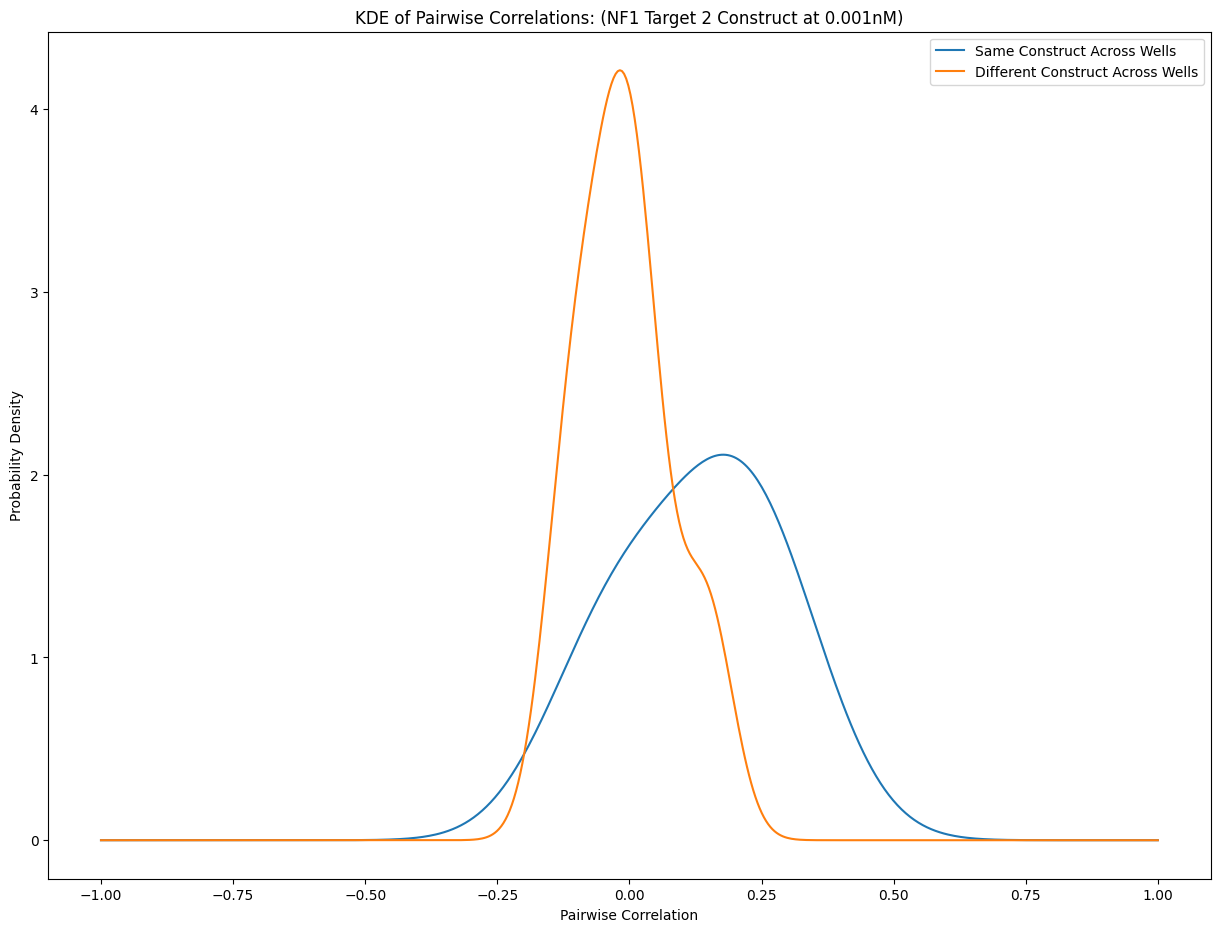

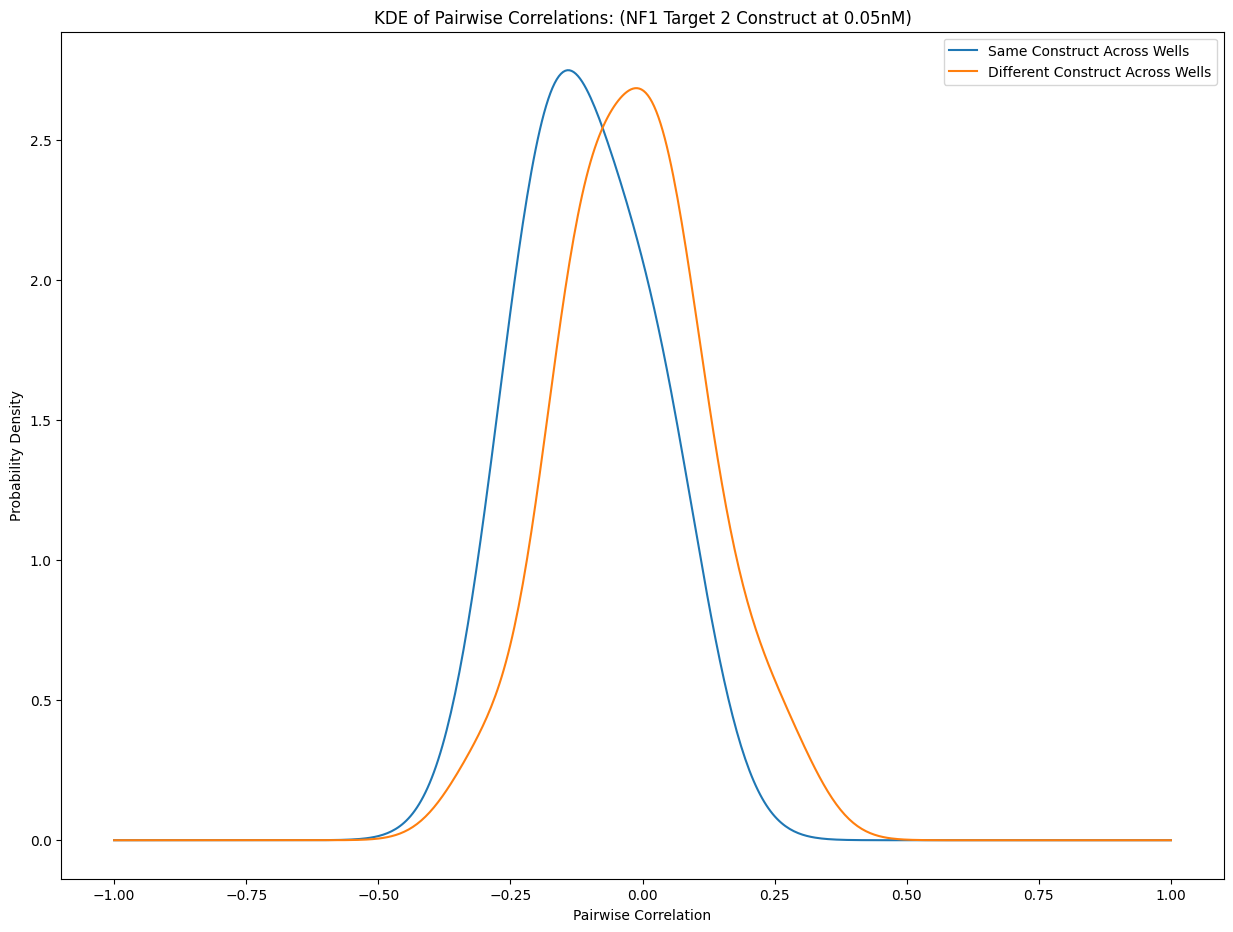

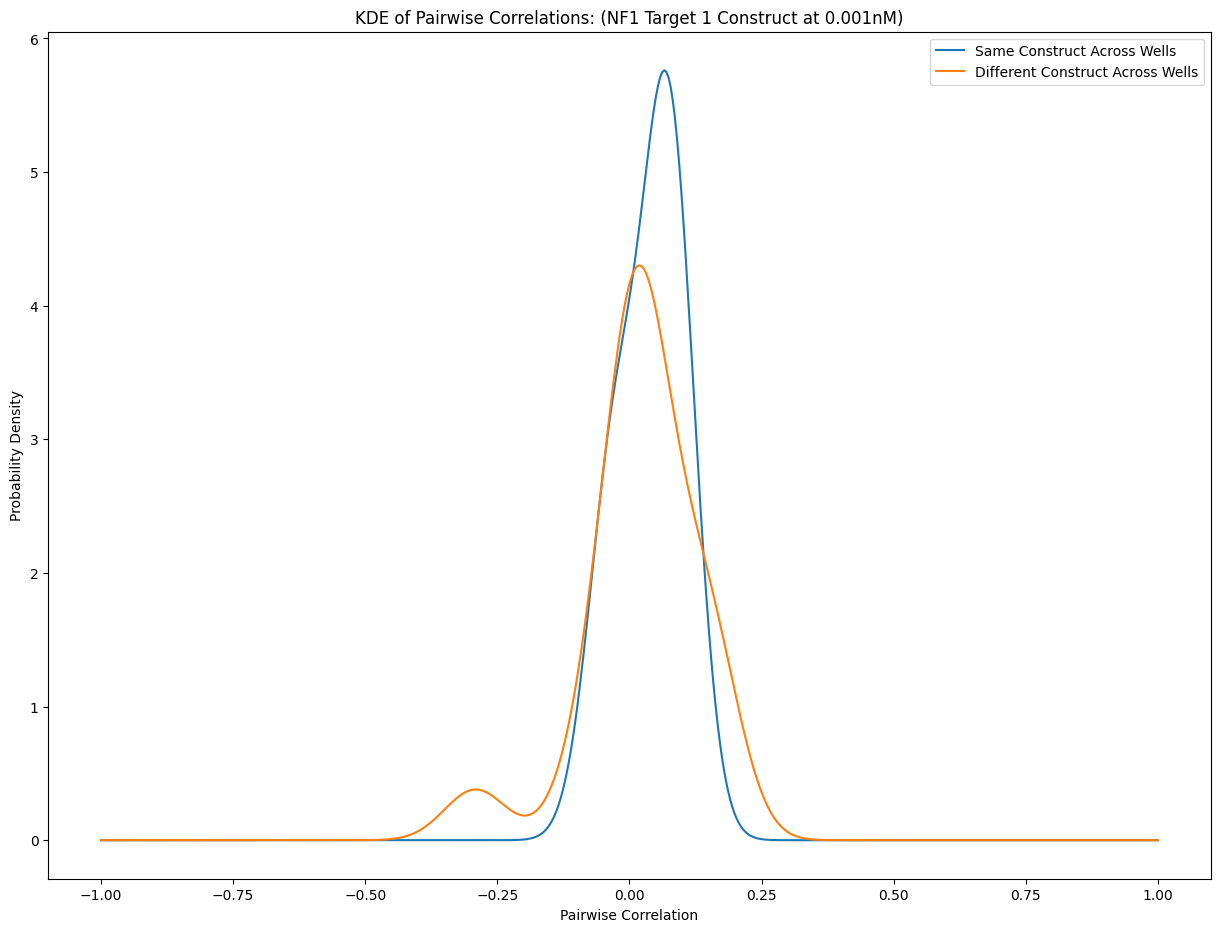

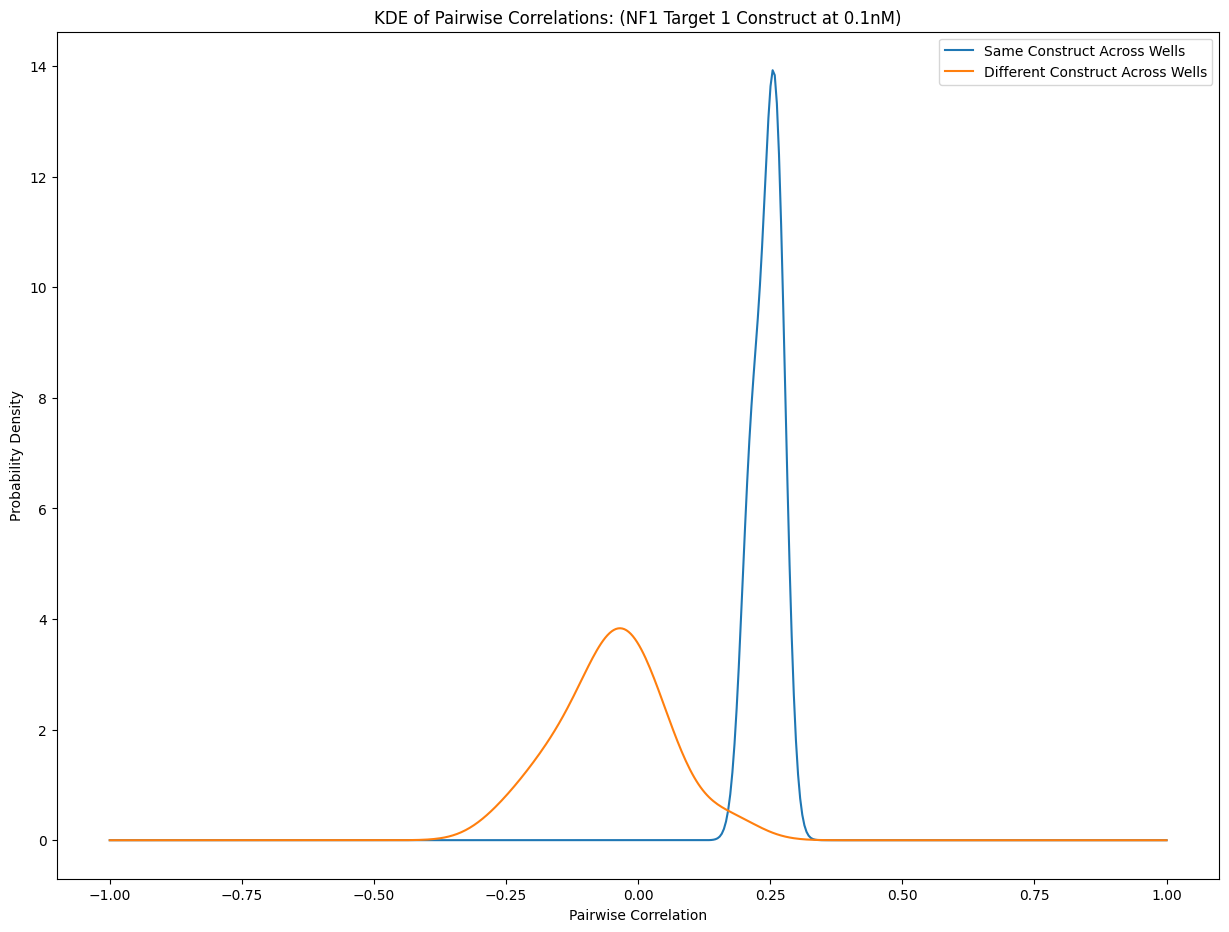

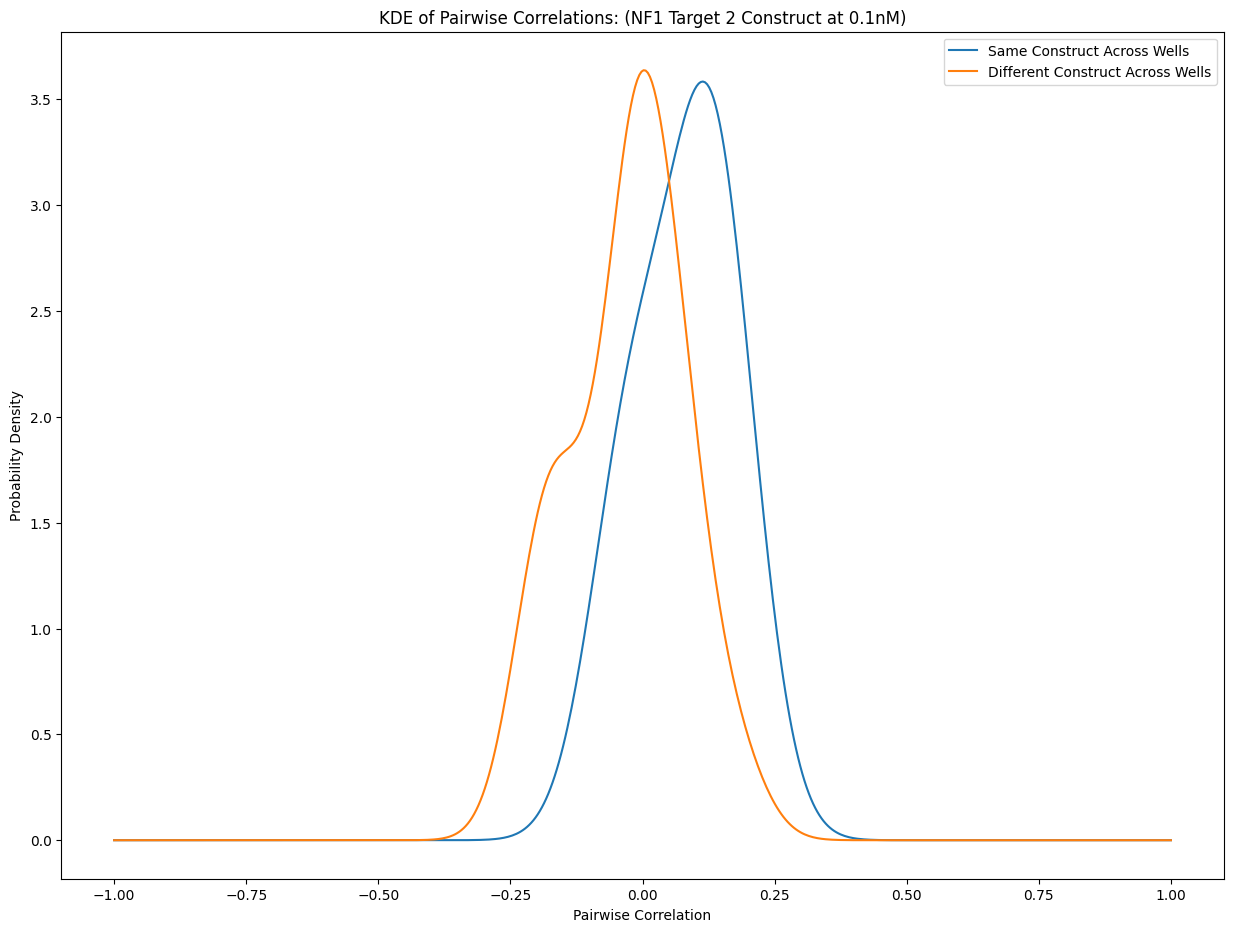

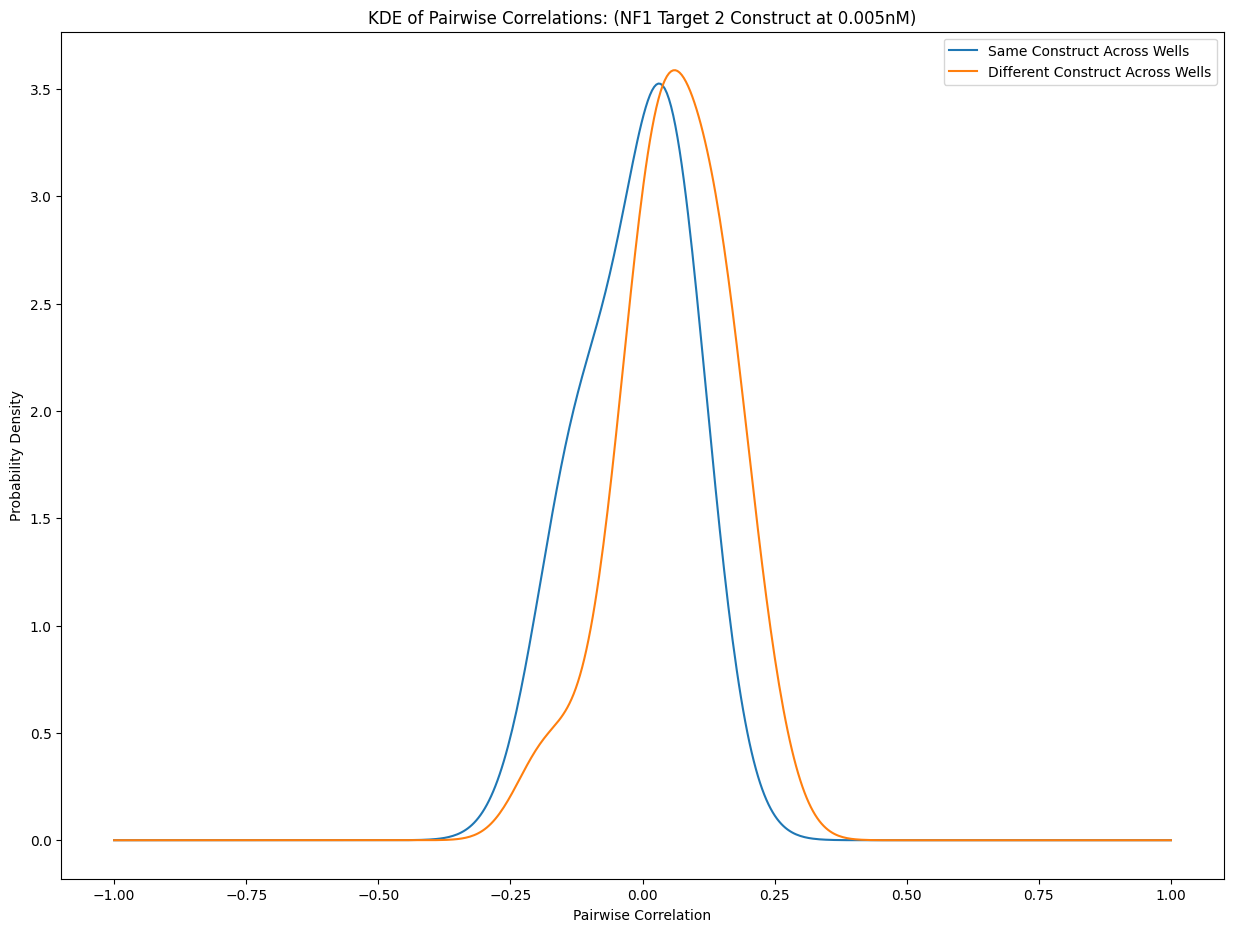

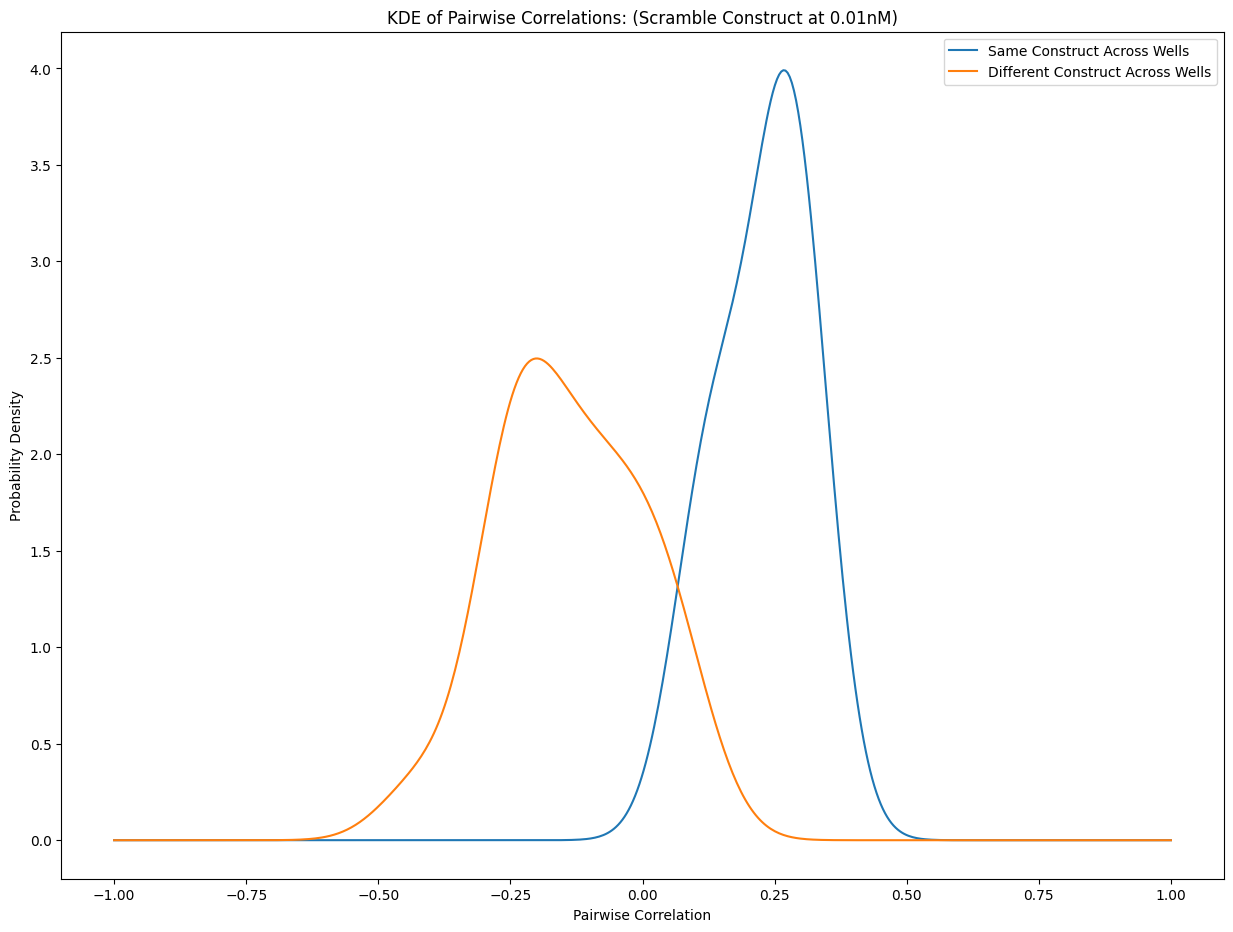

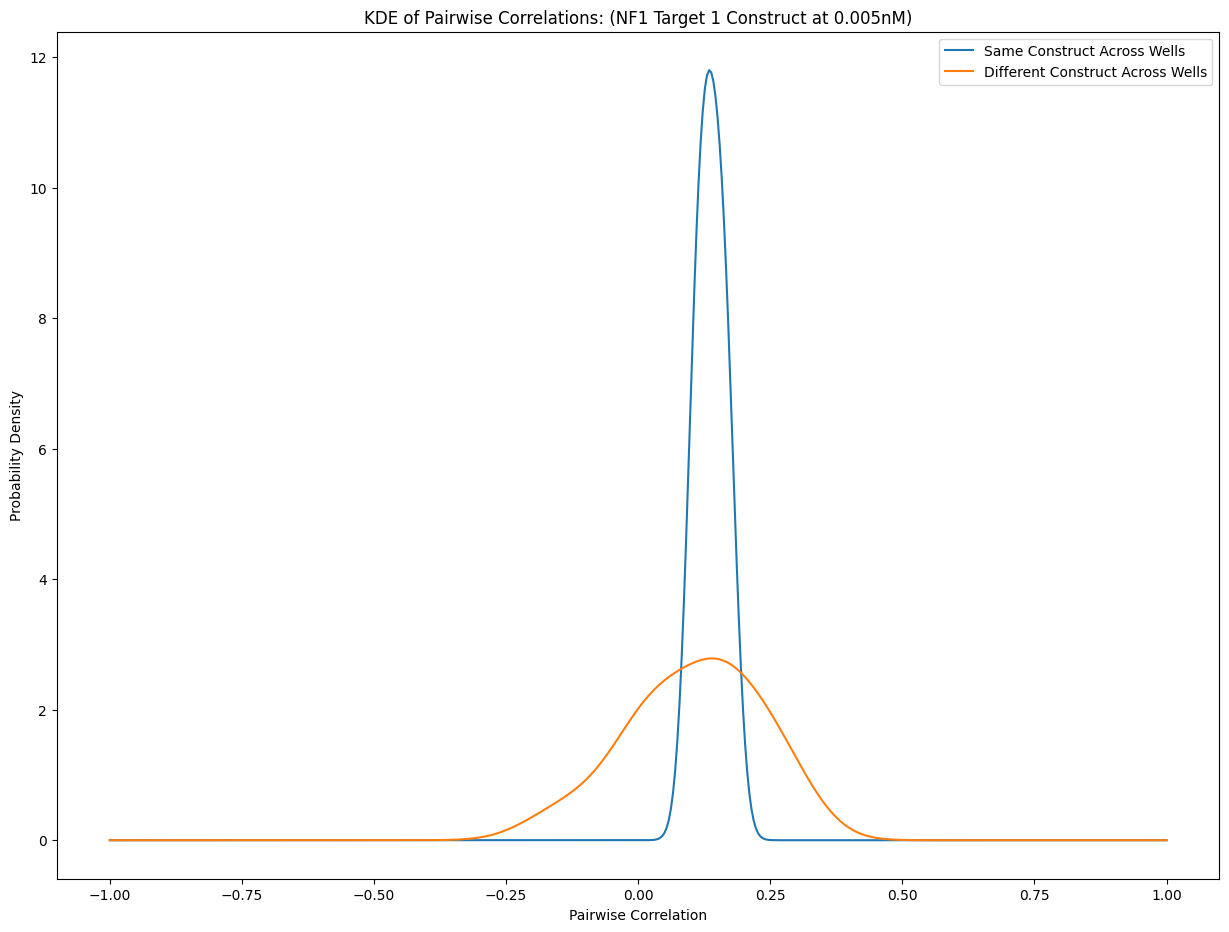

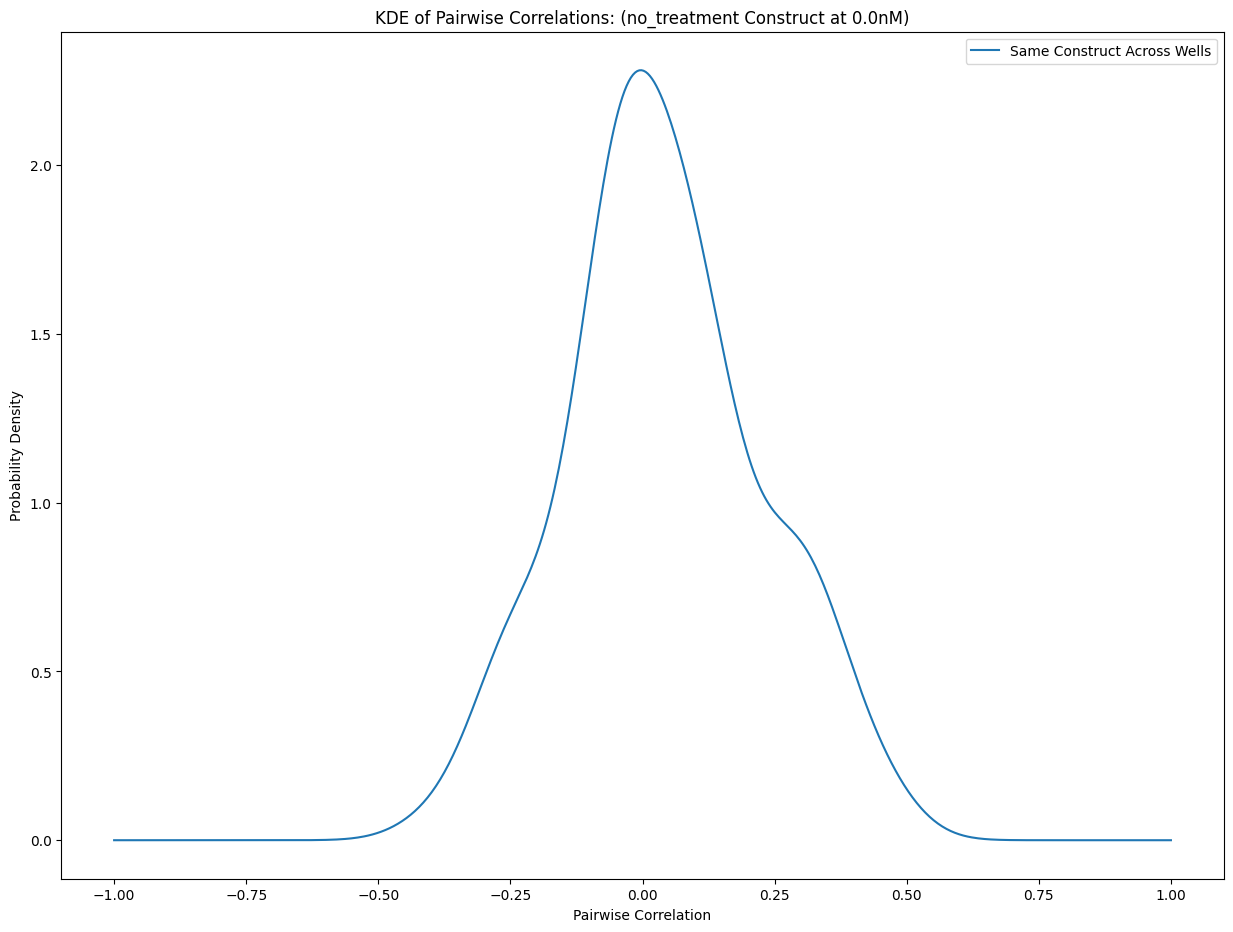

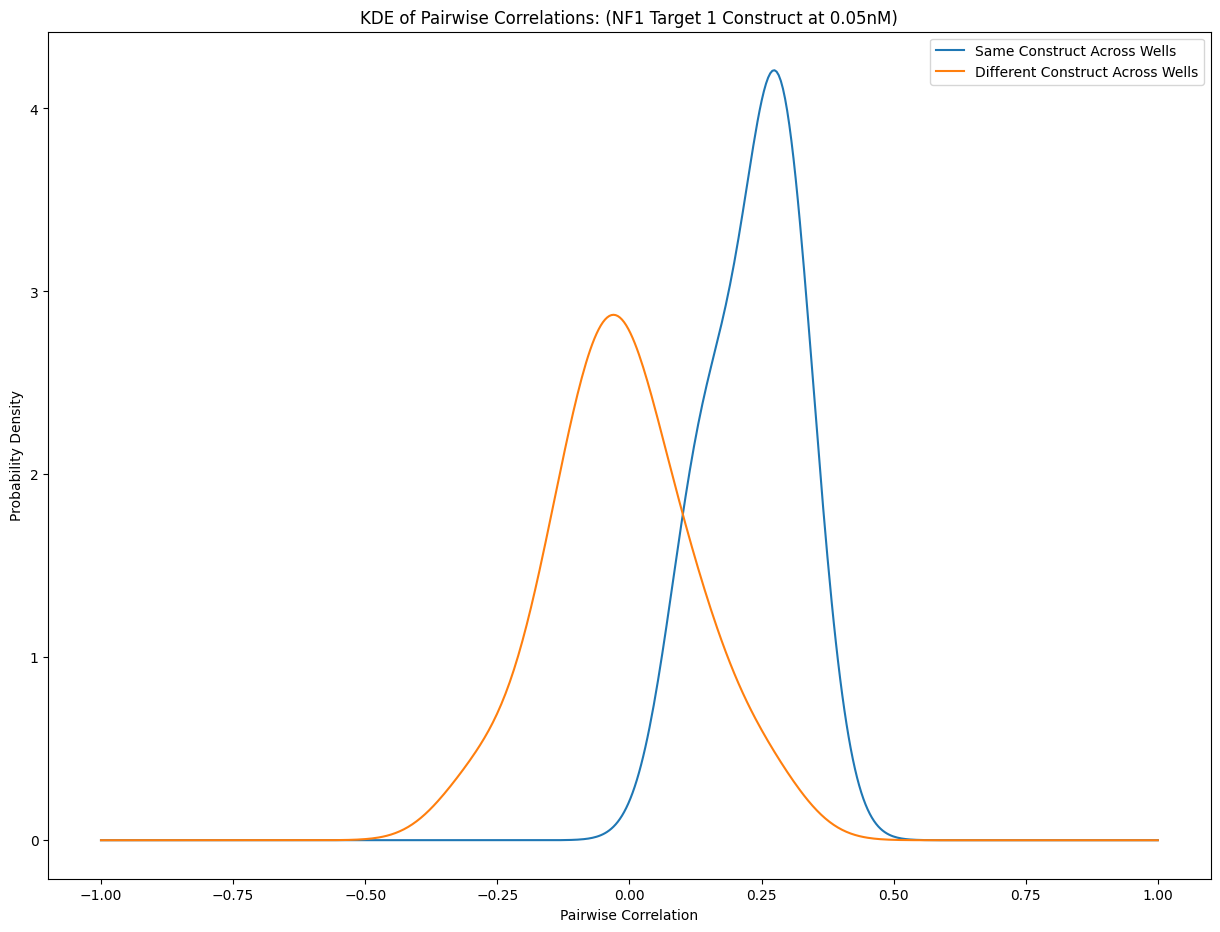

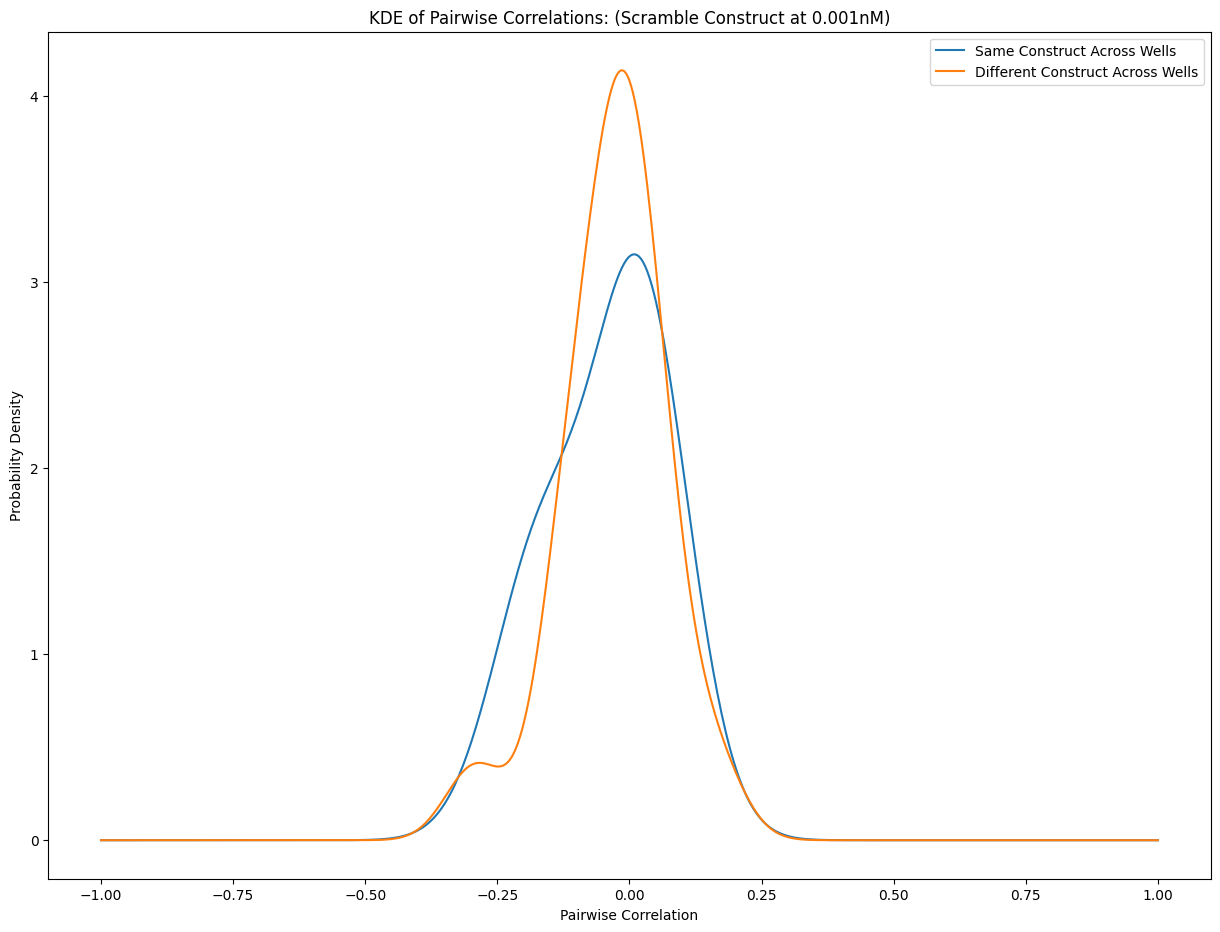

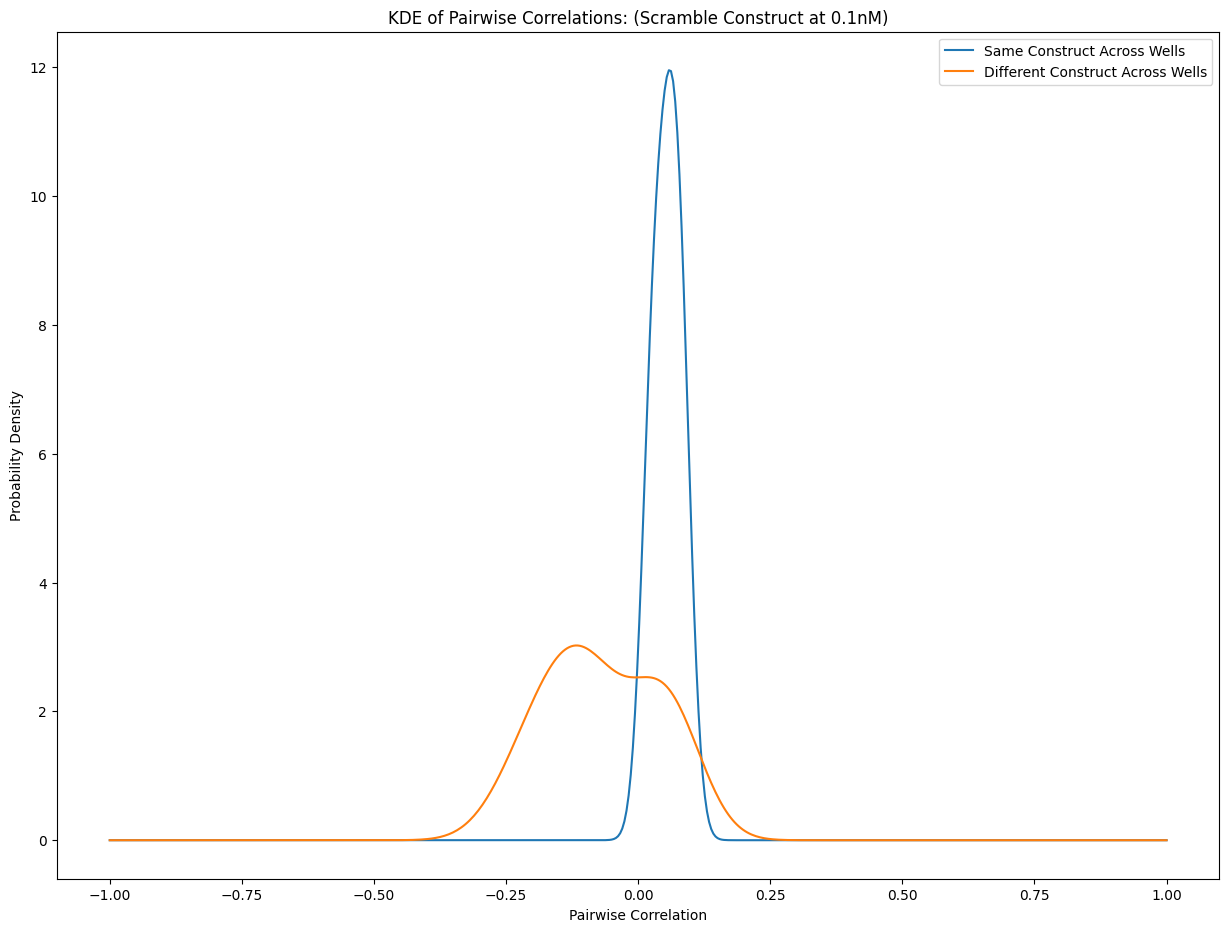

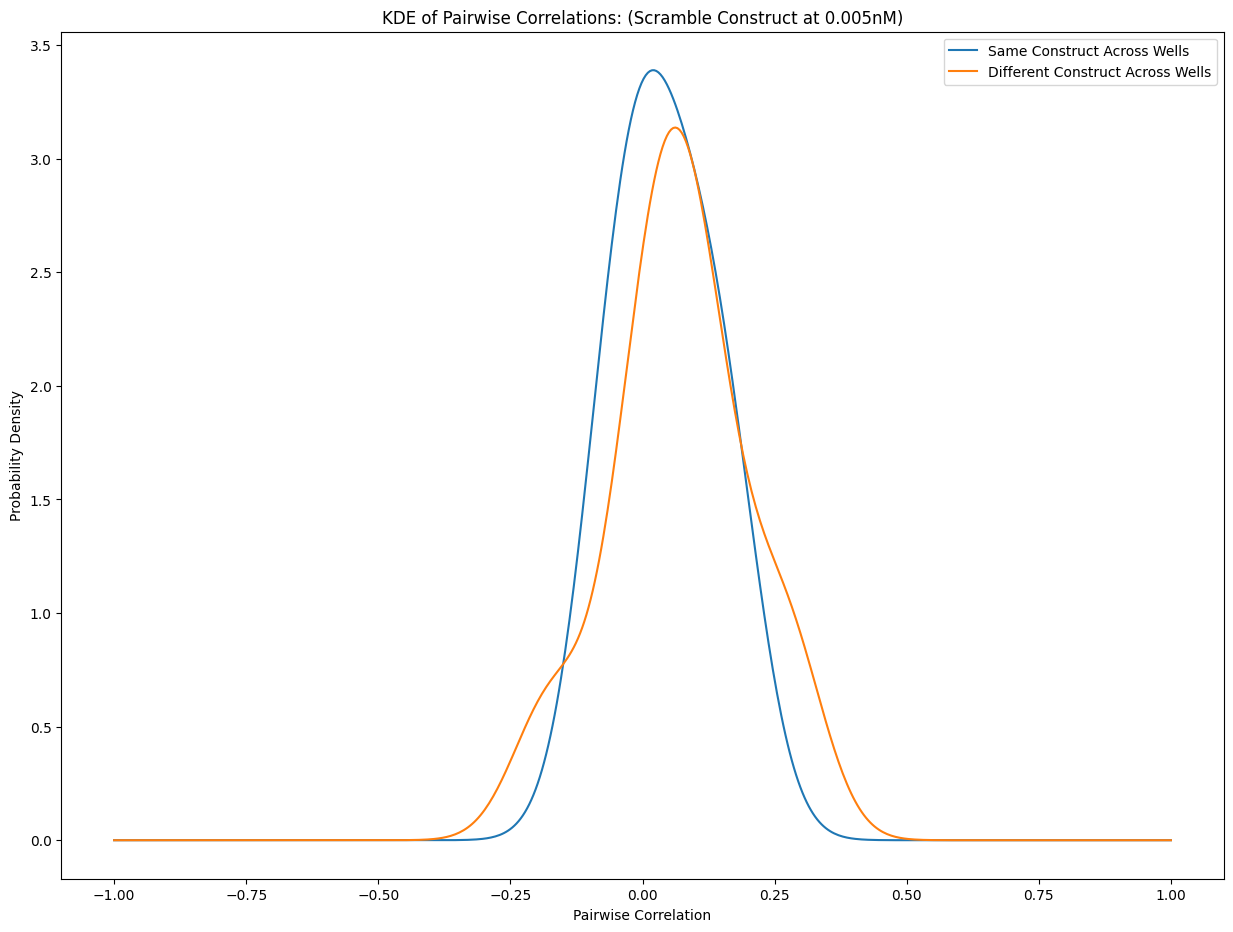

In [8]:
corr_obj.plot_correlations(output_path=output_path_figures)